In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from joypy import joyplot

In [3]:
datapath = 'summer-products-with-rating-and-performance_2020-08.csv'

In [4]:
productsdf=pd.read_csv(datapath, sep=',')
productsdf.shape

(1573, 43)

In [5]:
#Examine and clean data
productsdf.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [6]:
print("Duplicated records: ",productsdf[productsdf.duplicated()==True].shape[0])

Duplicated records:  34


In [7]:
#remove duplicated lines
productsdf = productsdf.drop_duplicates()
productsdf = productsdf.reset_index(drop=True)

In [8]:
print("Duplicated Product IDs: ",productsdf.product_id.duplicated().sum())

Duplicated Product IDs:  198


In [9]:
#remove duplicated product IDs
productsdf = productsdf.drop_duplicates('product_id')
productsdf = productsdf.reset_index(drop=True)

In [10]:
#updated shape
productsdf.shape

(1341, 43)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
productsdf = productsdf.copy()
productsdf['discount_offered'] = (1 - productsdf['price'] / productsdf['retail_price'])*100

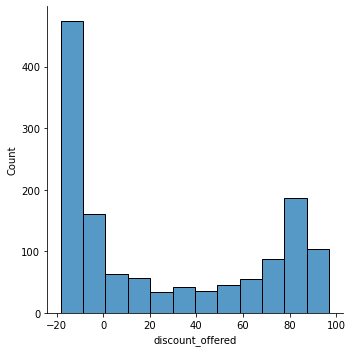

In [13]:
sns.displot(productsdf,kind='hist',x='discount_offered')

In [14]:
print("Total products with price greater than retail_price:",productsdf[productsdf.discount_offered<0].shape[0])

Total products with price greater than retail_price: 477


In [15]:
productsdf.currency_buyer.value_counts()

EUR    1341
Name: currency_buyer, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='units_sold'>

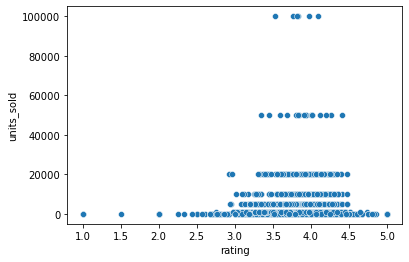

In [16]:
sns.scatterplot(data=productsdf,x='rating',y='units_sold')

In [17]:
productsdf.origin_country.value_counts(normalize=True)

CN    0.974398
US    0.020331
VE    0.002259
SG    0.001506
AT    0.000753
GB    0.000753
Name: origin_country, dtype: float64

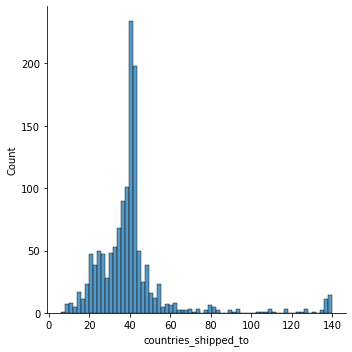

In [18]:
sns.displot(data=productsdf, x='countries_shipped_to')

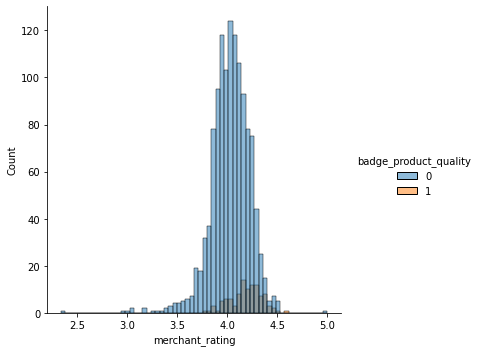

In [19]:
sns.displot(productsdf,x='merchant_rating',hue='badge_product_quality')

In [20]:
tags_list = [tags for tags in productsdf['tags']]
tags_text = ' '.join(tags_list)

In [21]:
!pip install wordcloud
from wordcloud import WordCloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\praso\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\praso\\AppData\\Local\\Temp\\pip-install-phz8g35g\\wordcloud_be06214b4e7348c1ac21464e20badfd0\\setup.py'"'"'; __file__='"'"'C:\\Users\\praso\\AppData\\Local\\Temp\\pip-install-phz8g35g\\wordcloud_be06214b4e7348c1ac21464e20badfd0\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\praso\AppData\Local\Temp\pip-wheel-t5jsvuwf'
       cwd: C:\Users\praso\AppData\Local\Temp\pip-install-phz8g35g\wordcloud_be06214b4e7348c1ac21464e20badfd0\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
word_cloud = WordCloud(background_color='white').generate(tags_text)

In [24]:
productsdf.product_color.value_counts().head(20)

black         264
white         206
pink           84
blue           84
yellow         80
red            78
green          77
grey           65
purple         49
navyblue       25
orange         24
armygreen      24
winered        23
multicolor     18
beige          14
khaki          11
gray            9
lightblue       8
rosered         7
skyblue         7
Name: product_color, dtype: int64

<AxesSubplot:xlabel='merchant_rating', ylabel='Count'>

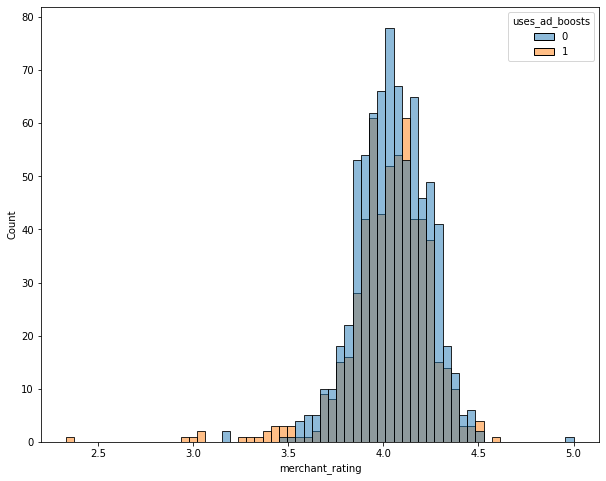

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(data=productsdf,x='merchant_rating',hue='uses_ad_boosts')

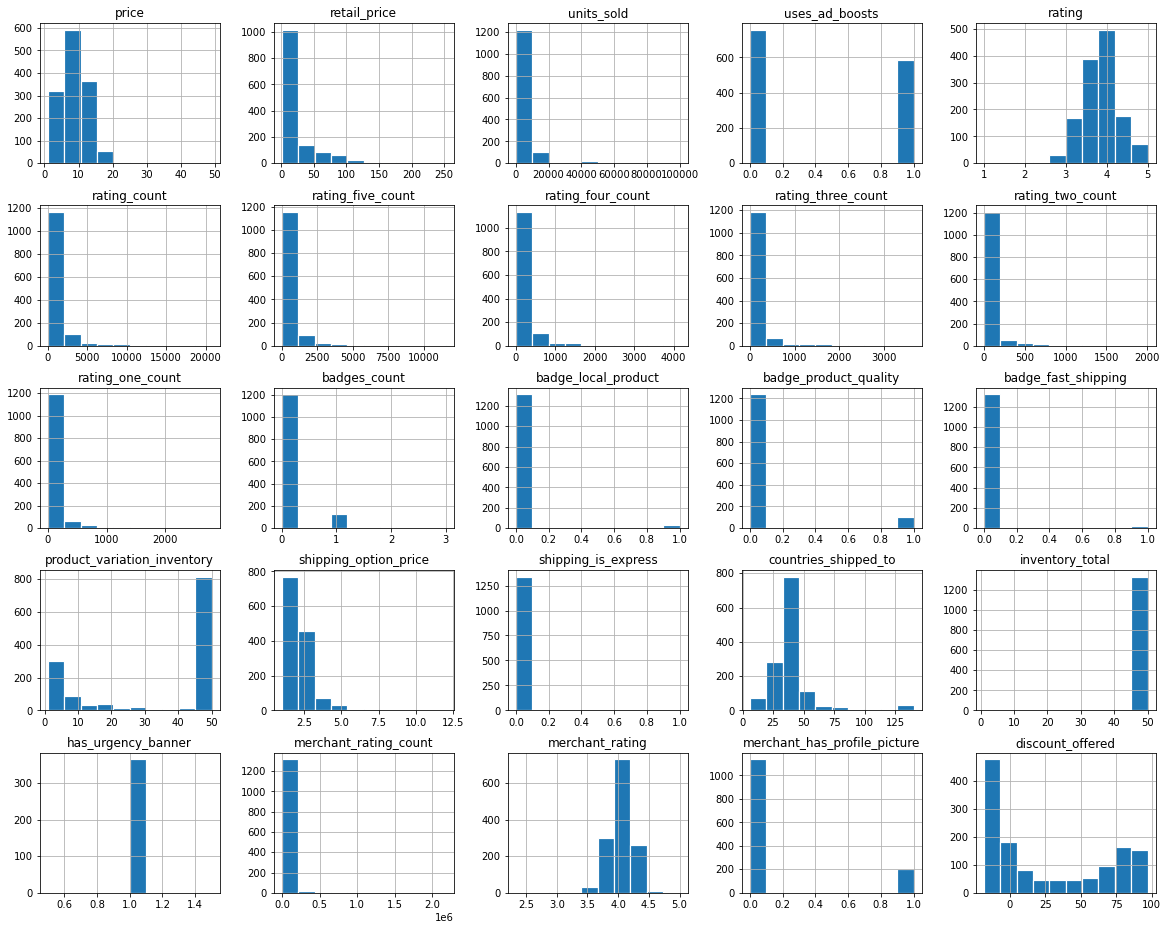

In [26]:
plt.close()
productsdf.hist(edgecolor='white', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

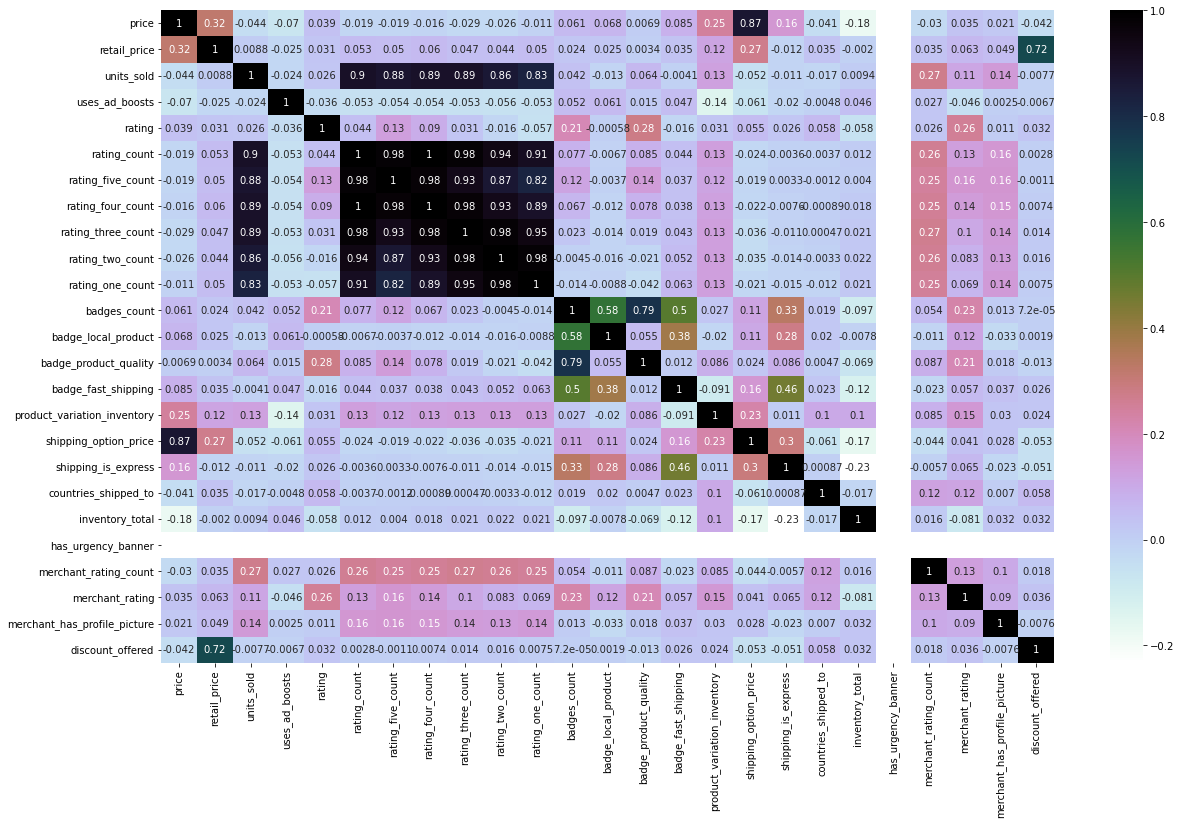

In [27]:
plt.figure(figsize=(20,12)) 
sns.heatmap(productsdf.corr(),annot=True,cmap='cubehelix_r') 
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

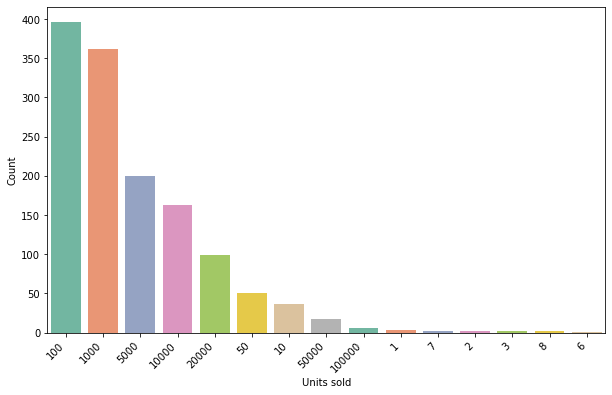

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'units_sold',
                   order = productsdf['units_sold'].value_counts().index,
                   palette= "Set2",
                   data=productsdf)
ax.set(xlabel='Units sold', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
def is_success(units_sold):
    if units_sold > 1000: 
        return 1
    else: 
        return 0 

In [33]:
productsdf['is_success'] = productsdf['units_sold'].apply(is_success) 
productsdf['is_success'].value_counts()

0    856
1    485
Name: is_success, dtype: int64

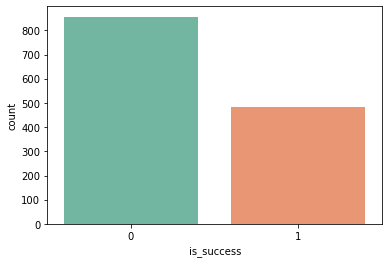

In [34]:
ax = sns.countplot(x = 'is_success',
                   palette= "Set2",
                   data=productsdf)
plt.show()

In [35]:
productsdf[['price', 'retail_price']].describe()

,price,retail_price
count,1341.000000,1341.000000
mean,8.458218,23.819538
std,3.977299,30.512737
min,1.000000,1.000000
25%,5.850000,7.000000
50%,8.000000,10.000000
75%,11.000000,26.000000
max,49.000000,252.000000


In [36]:
productsdf['percent_discount'] = (productsdf['retail_price'] - productsdf['price']) / productsdf['retail_price'] * 100
productsdf[['retail_price', 'price', 'percent_discount']].head()

,retail_price,price,percent_discount
0,14,16.00,-14.285714
1,22,8.00,63.636364
2,43,8.00,81.395349
3,8,8.00,0.000000
4,3,2.72,9.333333


<AxesSubplot:xlabel='is_success', ylabel='percent_discount'>

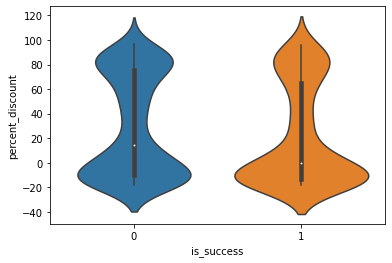

In [37]:
sns.violinplot(data=productsdf, y='percent_discount', x='is_success')

In [38]:
productsdf['tags'].head()

0    Summer,Fashion,womenunderwearsuit,printedpajam...
1    Mini,womens dresses,Summer,Patchwork,fashion d...
2    Summer,cardigan,women beachwear,chiffon,Sexy w...
3    Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4    Summer,Plus Size,Lace,Casual pants,Bottom,pant...
Name: tags, dtype: object

In [39]:
category = pd.read_csv('unique-categories.sorted-by-count.csv')
print(category.shape)
category.head()

(2620, 2)


,count,tag
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


In [40]:
productsdf['product_color'] = productsdf['product_color'].str.lower()

In [41]:
productsdf[productsdf['product_color'].str.contains('&', na=False)]['product_color'].unique()

array(['red & blue', 'blue & pink', 'white & green', 'black & green',
       'orange & camouflage', 'pink & black', 'pink & grey',
       'black & white', 'white & black', 'pink & white', 'pink & blue',
       'black & stripe', 'gray & white', 'brown & yellow',
       'winered & yellow', 'navyblue & white', 'white & red',
       'black & yellow', 'black & blue'], dtype=object)

In [42]:
shade_to_colour = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}

def update_color(col):
    if shade_to_colour.get(col, False):
        return shade_to_colour.get(col)
    elif '&' in col:
        return 'dual'
    elif col in shade_to_colour.values():
        return col
    else:
        return 'other'

productsdf['product_color'].replace(np.nan, 'others', inplace=True)

productsdf['product_color'] = productsdf.product_color.apply(update_color)

In [43]:
count = productsdf['product_color'].value_counts()
count

black     270
white     212
blue      138
green     126
red       120
other      98
pink       93
yellow     82
grey       79
purple     50
dual       34
orange     26
brown      13
Name: product_color, dtype: int64

In [44]:
col_df = productsdf.groupby('product_color').agg('sum')['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)
col_df

,product_color,units_sold
0,black,1482393
1,blue,557348
2,brown,31750
3,dual,123350
4,green,569575
5,grey,497420
6,orange,183758
7,other,628122
8,pink,298950
9,purple,338320


<AxesSubplot:xlabel='product_color', ylabel='units_sold'>

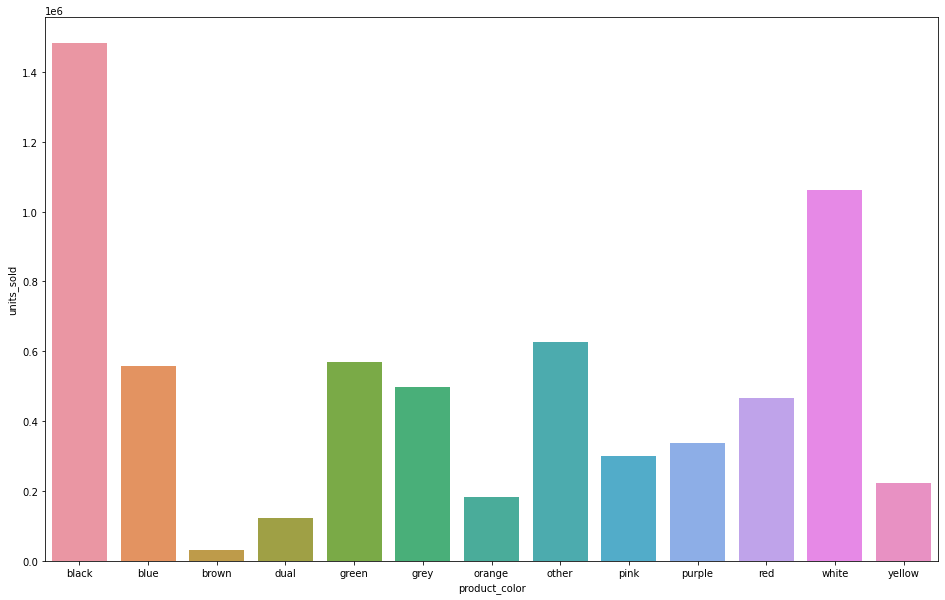

In [45]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_color", y="units_sold", data=col_df)

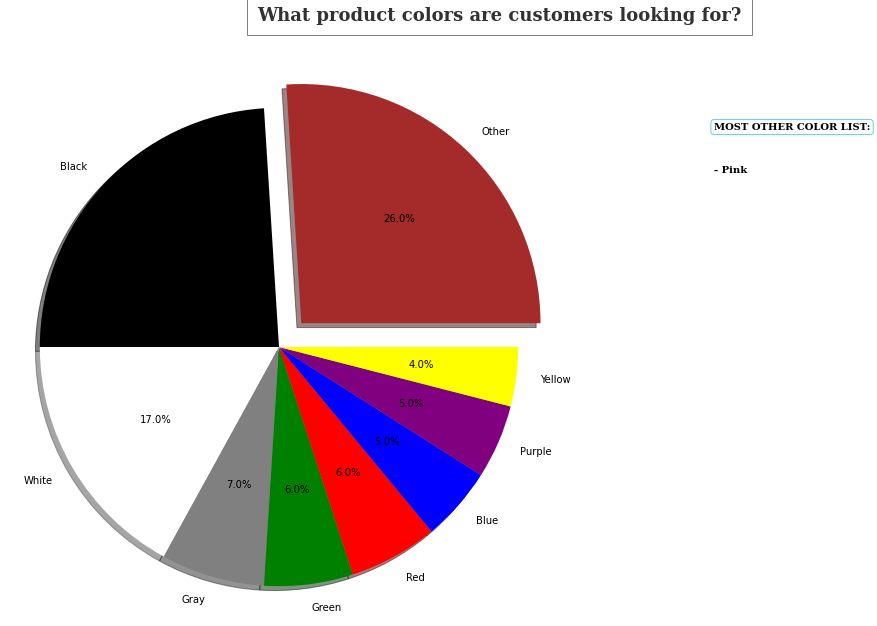

In [47]:
other_col = ['Pink', 'Pair Color', 'Armygreen', 'Winered', 'Navyblue', 'Other']
size_other_col = [99, 38, 30, 27, 27, 181]

prod_col = productsdf.groupby(['units_sold', 'product_color']).count().loc[:, 'title_orig'].reset_index()
prod_col['color_sold'] = prod_col['units_sold'] * prod_col['title_orig']
data_col = prod_col.groupby('product_color')['color_sold'].sum().sort_values(ascending = False).reset_index()
data_col['percent'] = round(data_col['color_sold'] / data_col['color_sold'].sum(), 2)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

label = ['Other', 'Black', 'White', 'Gray', 'Green', 'Red', 'Blue', 'Purple', 'Yellow']
size_color = [0.26, 0.24, 0.17, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04]
explode = [0.15, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(size_color, labels = label, explode = explode, autopct = '%1.1f%%', 
             counterclock = True, shadow = True, radius = 1.1, 
             colors = [ 'brown', 'black', 'white', 'gray', 'green', 'red', 'blue', 'purple', 'yellow', 'white'])

ax.text(2, 1, 'MOST OTHER COLOR LIST:', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox=dict(boxstyle="round", fc="white", color = '#66ccff'))

ax.text(-0.1, 1.5, 'What product colors are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

y_pos = [0.8, 0.6, 0.4, 0.2, 0, -0.2]
for i, y in zip(other_col, y_pos):
    ax.text(2, y, f'- {i}', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox = dict(boxstyle = "round", color = 'white'))
    plt.show()
    

<AxesSubplot:xlabel='tags_count', ylabel='units_sold'>

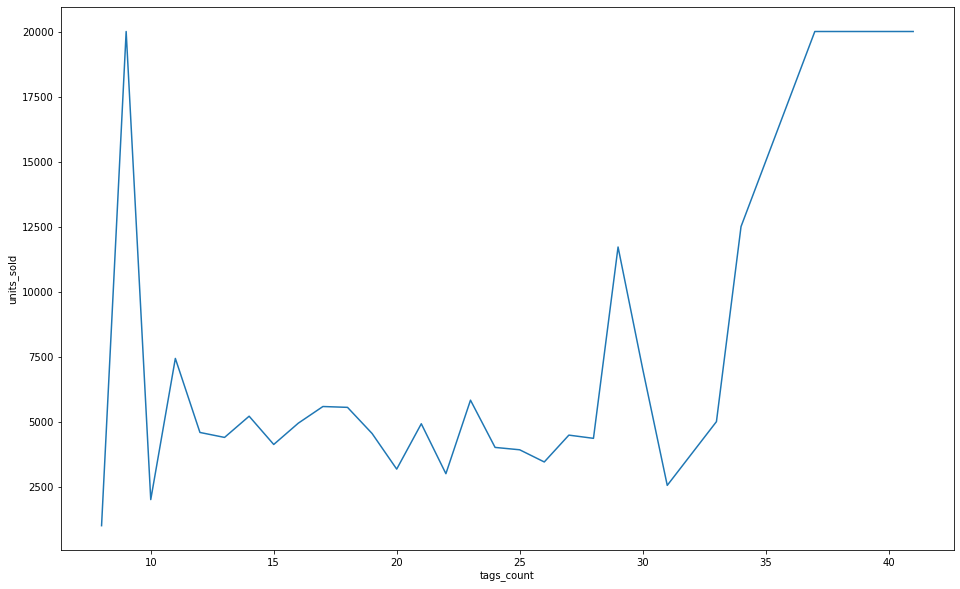

In [48]:
productsdf['tags_count'] = productsdf['tags'].str.split(',').str.len()

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.lineplot(data=productsdf, x="tags_count", y="units_sold", ci=None)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


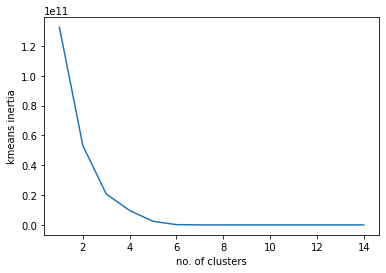

In [29]:
from sklearn.cluster import KMeans

clusters = {}
for i in range(1,15):
    kmeans = KMeans(n_clusters=i).fit(productsdf[['units_sold']])
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()));
plt.xlabel('no. of clusters');
plt.ylabel('kmeans inertia');

In [50]:
productsdf.groupby(['uses_ad_boosts'])['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
uses_ad_boosts,,,,,,,,
0,757.0,5027.158520,10125.796202,1.0,100.0,1000.0,5000.0,100000.0
1,584.0,4552.996575,9714.160788,10.0,100.0,1000.0,5000.0,100000.0


In [51]:
rating_cols=['rating_count','rating_five_count','rating_four_count',
             'rating_three_count','rating_two_count','rating_one_count']
ratings_data=productsdf[rating_cols+['uses_ad_boosts']]

In [52]:
ratings_data.groupby('uses_ad_boosts').describe()

rating_count                                              \
                      count         mean          std  min   25%    50%   
uses_ad_boosts                                                            
0                     757.0  1080.096433  2255.718034  0.0  35.0  277.0   
1                     584.0   854.518836  1856.903440  0.0  28.0  150.5   

                               rating_five_count              ...  \
                  75%      max             count        mean  ...   
uses_ad_boosts                                                ...   
0               999.0  20744.0             736.0  536.010870  ...   
1               901.5  17980.0             570.0  424.305263  ...   

               rating_two_count         rating_one_count              \
                            75%     max            count        mean   
uses_ad_boosts                                                         
0                         77.00  2003.0            736.0  115.293478   
1                         63.75  1410.0            570.0   91.182456   

                                                           
                      std  min  25%   50%     75%     max  
uses_ad_boosts                                             
0               245.94377  0.0  5.0  30.5  124.00  2789.0  
1               195.42917  0.0  4.0  19.0   89.75  1846.0  

[2 rows x 48 columns]

In [53]:
def plot_missing_data(productsdf):
    columns_with_null = productsdf.columns[productsdf.isna().sum() > 0]
    null_pct = (productsdf[columns_with_null].isna().sum() / productsdf.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');

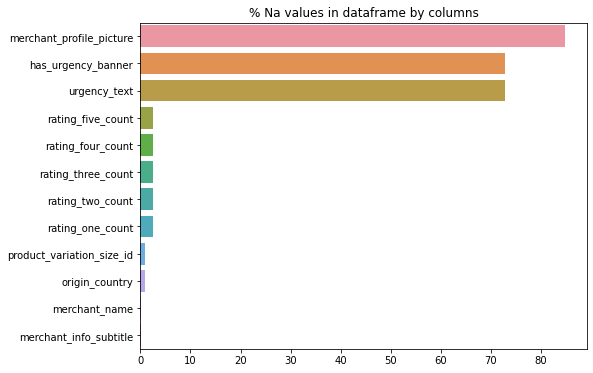

In [54]:
plot_missing_data(productsdf)

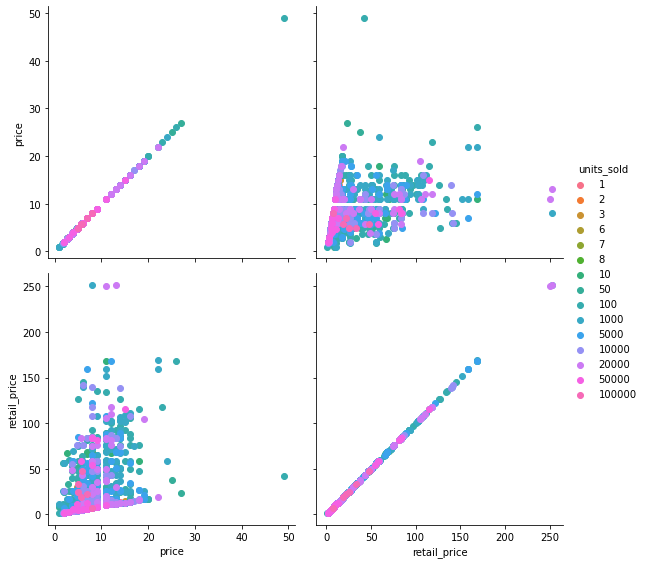

In [55]:
#How the sale price and retail price variation influences the purchases made by customers
g = sns.PairGrid(data=productsdf, vars = ['price', 'retail_price'], hue='units_sold', height=4)
g.map(plt.scatter)
g.add_legend()
plt.show()

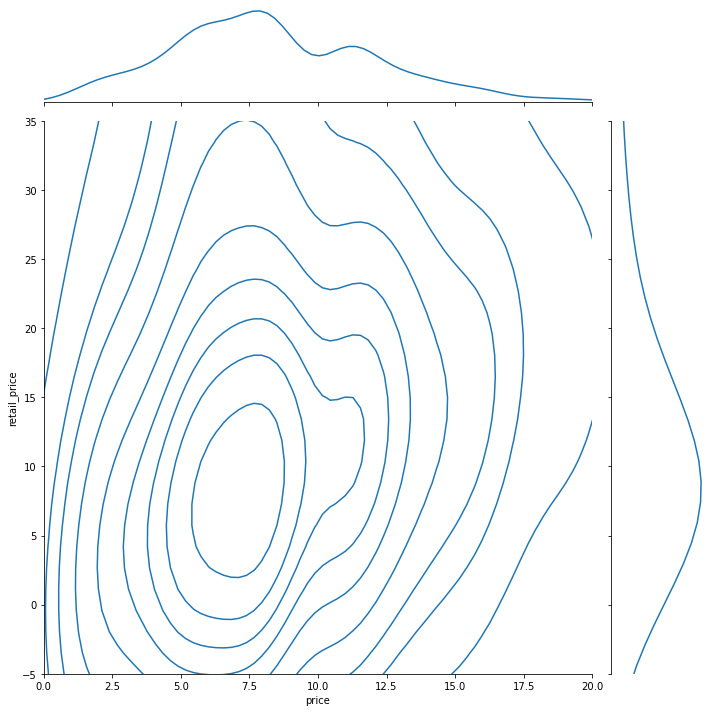

In [58]:
sns.jointplot(x='price', y='retail_price', data=productsdf, kind='kde', xlim=(0,20), ylim=(-5,35), height=10)
plt.show()

Text(0, 0.5, 'units sold')

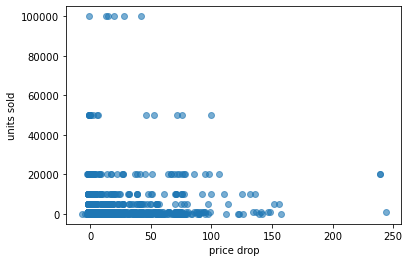

In [57]:
productsdf['price_drop'] = productsdf['retail_price'] - productsdf['price']
plt.scatter(productsdf['price_drop'], productsdf['units_sold'], alpha=.6)
plt.xlabel('price drop')
plt.ylabel('units sold')